# LOGISTIC REGRESSION ASSIGNMENT | Banking Dataset Classification

## Introduction of the Dataset


The Banking Dataset Classification consists of 32,950 entries and 16 columns, capturing various demographic and banking-related attributes of clients. The features include age, job, marital status, education, default, housing loan, personal loan, contact communication type, last contact month, last contact day of the week, and other campaign-related variables such as duration, campaign, pdays, previous, and poutcome. The target variable is 'y', indicating whether the client has subscribed to a term deposit. This dataset is useful for predicting client subscription behavior based on the provided features.

Features:

- Demographic Information: age, job, marital status, education.
- Loan Information: default, housing loan, personal loan.
- Contact Details: contact type, last contact month, day of the week.
- Campaign Information: duration, campaign, pdays, previous, poutcome.
- Target Variable: 'y', a binary variable indicating whether the client subscribed to a term deposit.

## Import Libraries

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [60]:
df = pd.read_csv(r"C:\Ozy\Data Science\DS datasets\new_train.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


## Basic Information of dataset

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


## Summary of the dataset

In [62]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


## Checking Missing values in DataFrame

In [63]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

## Visualizations

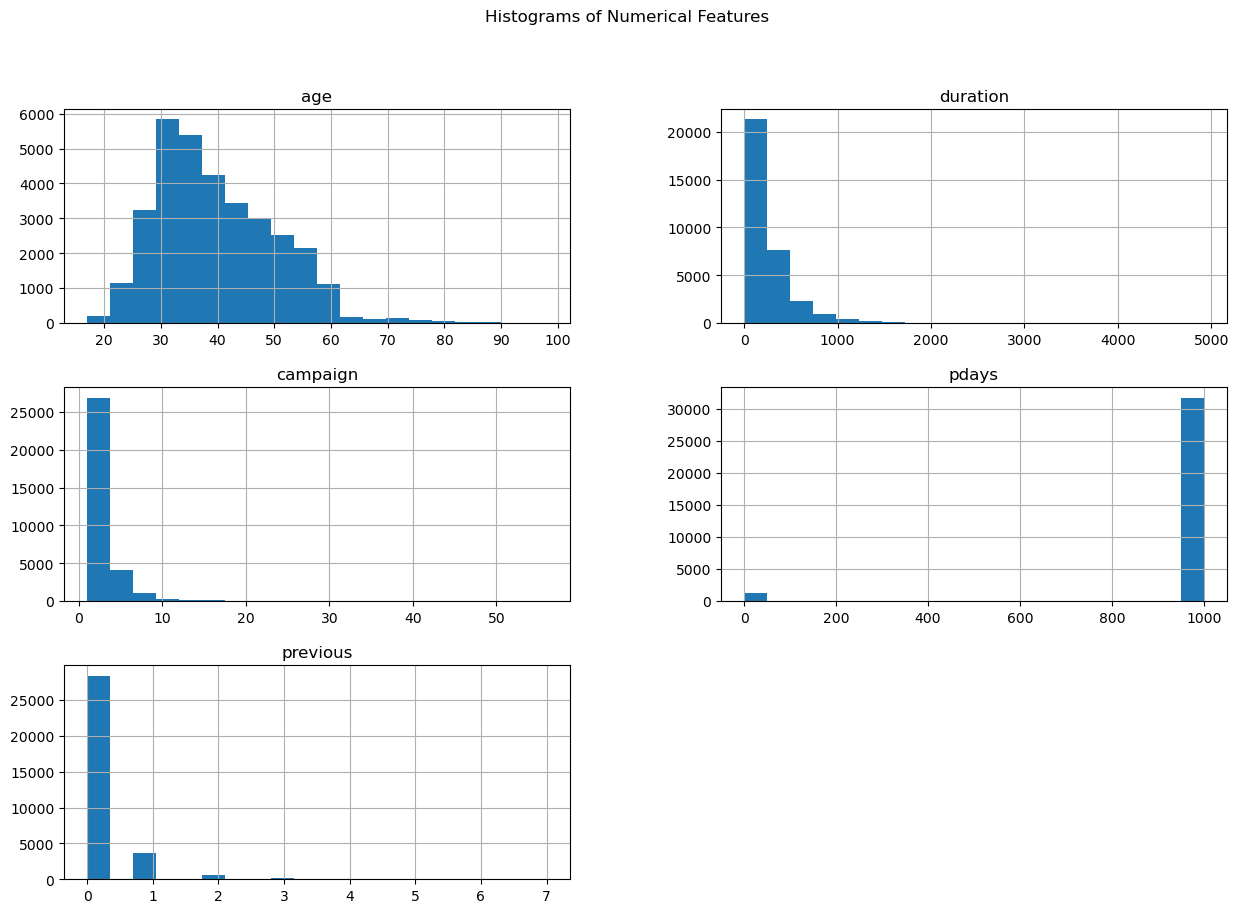

In [64]:
# Histograms for Numerical Features
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

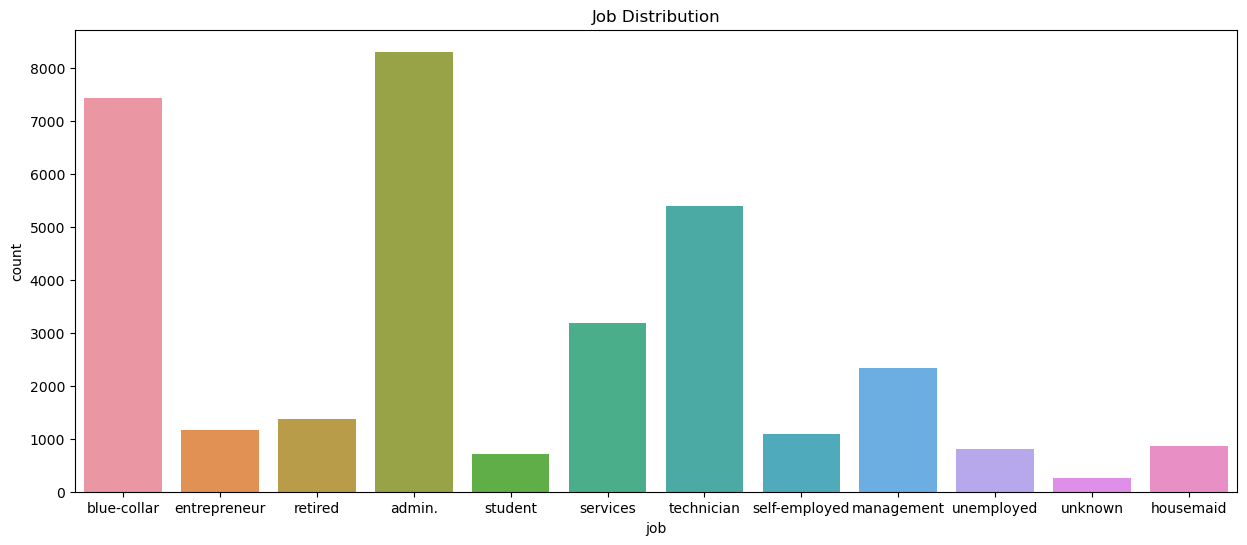

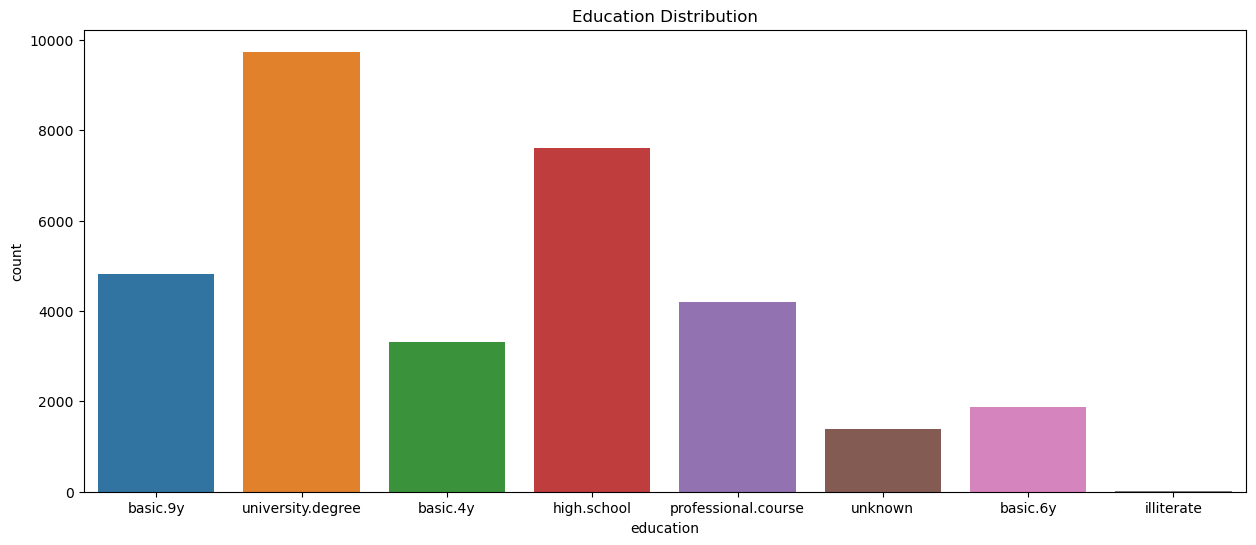

In [65]:
# Count Plots for Categorical Features
plt.figure(figsize=(15, 6))
sns.countplot(x='job', data=df)
plt.title('Job Distribution')
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(x='education', data=df)
plt.title('Education Distribution')
plt.show()

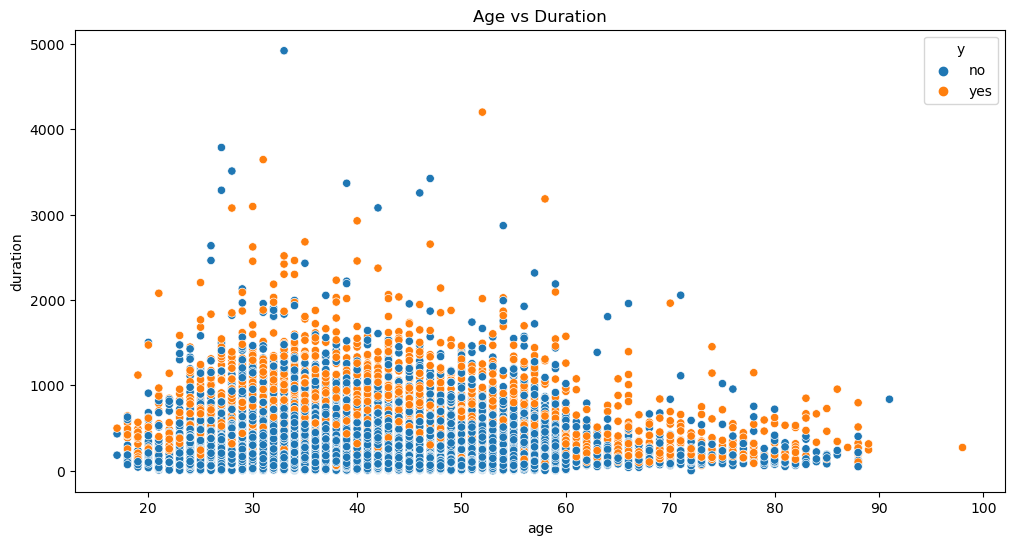

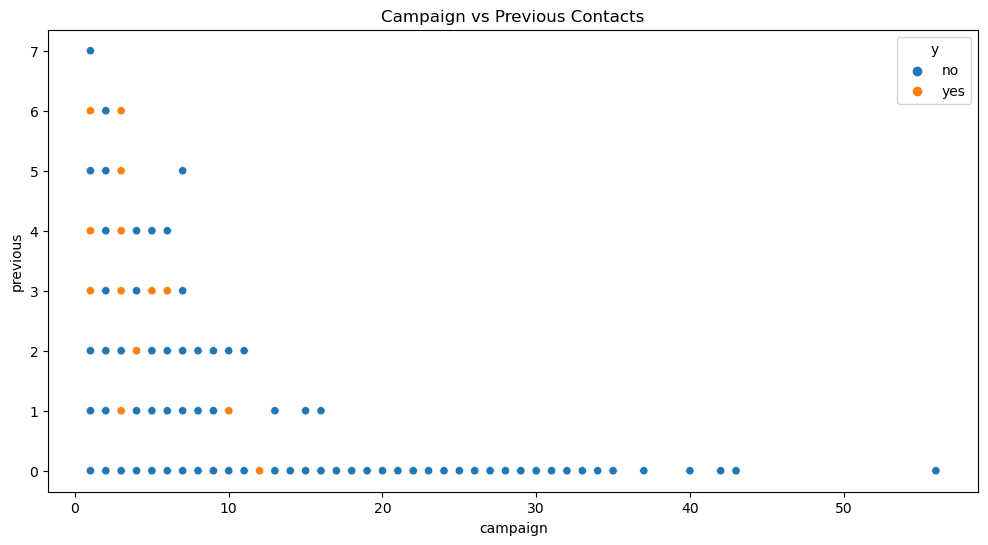

In [66]:
# Scatter Plots for Relationship Analysis (Age vs Duration)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='duration', hue='y', data=df)
plt.title('Age vs Duration')
plt.show()

# Scatter Plots for Relationship Analysis (Campaign vs Previous Contacts)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='campaign', y='previous', hue='y', data=df)
plt.title('Campaign vs Previous Contacts')
plt.show()

- Histograms for numerical features to understand their distributions.
- Count plots to visualize the distribution of categorical features like 'job' and 'education
- Plotted scatter plots (Age vs. Duration) & (Campaign vs Previous Contacts) to examine relationships between numerical features.

## Encoding Categorical Variables

In [67]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Ensure all boolean columns are converted to integers (0 and 1)
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
df.head()

,age,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,49,227,4,999,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,37,202,2,999,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,78,1148,1,999,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
3,36,120,2,999,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,59,368,2,999,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


## Splitting the Dataset

In [68]:
from sklearn.model_selection import train_test_split

# Define feature set X and target variable y
X = df.drop('y_yes', axis=1)
y = df['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (26360, 48) (26360,)
Testing set shape: (6590, 48) (6590,)


## Implement Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with chosen hyperparameters
log_reg = LogisticRegression(C=1, solver='liblinear', max_iter=1000, random_state=42)

- Regularization Strength (C): Controls the trade-off between fitting the training data and regularizing the model. 
- Solver: Algorithm used to optimize the logistic regression function. Choices include 'liblinear', 'saga', and 'newton-cg'.

# Train the model on the Training Data

In [70]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, random_state=42, solver='liblinear')

## Make predictions on the Test Data

In [71]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

## Calculate Evaluation Metrics

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')


Accuracy: 0.90
Precision: 0.66
Recall: 0.35
F1-Score: 0.46
ROC-AUC: 0.91


## Confusion Matrix

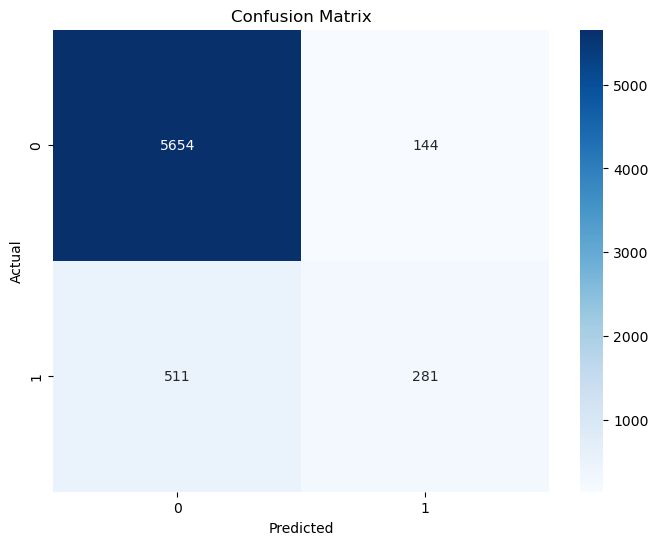

In [73]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- The confusion matrix visualizes the performance of the classification model by showing the number of true positives, true negatives, false positives, and false negatives. It provides insights into the types of errors made by the model.

## Classification Report

In [74]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5798
           1       0.66      0.35      0.46       792

    accuracy                           0.90      6590
   macro avg       0.79      0.66      0.70      6590
weighted avg       0.89      0.90      0.89      6590



- The classification report summarizes key performance metrics such as precision, recall, and F1-score for each class, offering a detailed view of the model's accuracy and effectiveness in classifying each class

## Plot the ROC Curve

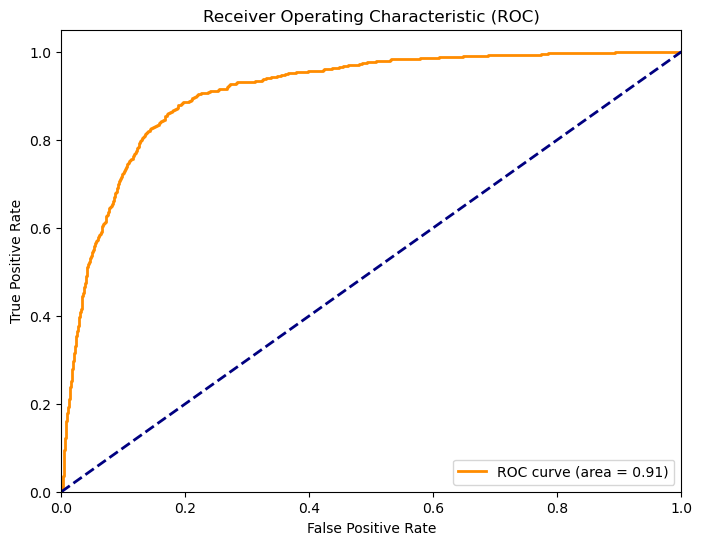

In [75]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


- The ROC curve plots the true positive rate against the false positive rate for different threshold values, illustrating the model's ability to discriminate between classes. The area under the ROC curve (AUC) represents the overall performance of the model.

## Visualizing Model Coefficients

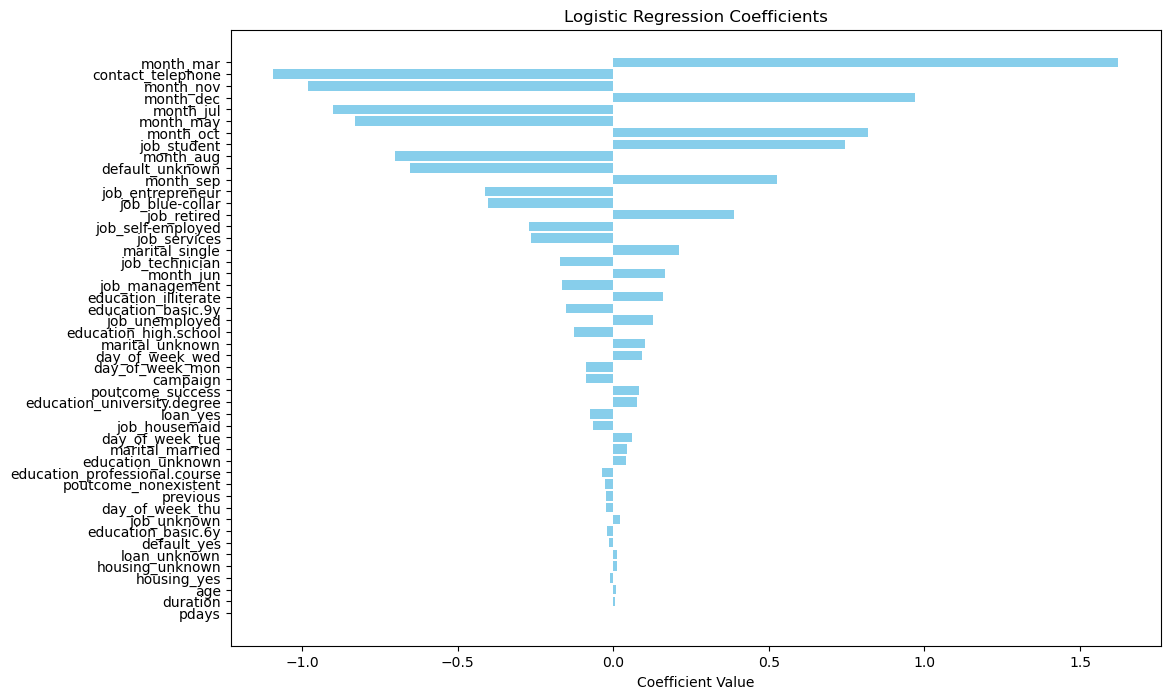

In [76]:
# Get feature names
feature_names = X.columns

# Get coefficients
coefficients = log_reg.coef_[0]

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients for better visualization
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient')

# Plot the coefficients
plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

- Coefficients: Show the weight of each feature in the model, indicating feature importance.
- Bar Plot: Visualizes the impact of each feature on the model’s predictions.

## Hyperparameter Tuning with Grid Search

In [77]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # 5-fold cross-validation
                           verbose=1,
                           n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-validation Score: {best_score:.4f}')

# Best model
best_rf_model = grid_search.best_estimator_

# Validate the best model on test data
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred_best = best_rf_model.predict(X_test)
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Best Model):", accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Cross-validation Score: 0.9068
Confusion Matrix (Best Model):
 [[5654  144]
 [ 510  282]]

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      5798
           1       0.66      0.36      0.46       792

    accuracy                           0.90      6590
   macro avg       0.79      0.67      0.70      6590
weighted avg       0.89      0.90      0.89      6590


Accuracy Score (Best Model): 0.9007587253414264


- Define the Parameter Grid: Specify a range of values for hyperparameters like C (regularization strength) and solver.
- Initialize GridSearchCV: This performs an exhaustive search over the parameter grid using cross-validation.
- Fit GridSearchCV: Train the model for each combination of parameters and evaluate its performance.
- Retrieve Best Parameters: Identify the hyperparameters that yield the highest cross-validation score.

## Cross-Validation

In [78]:
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression with the best parameters
optimized_log_reg = LogisticRegression(C=best_params['C'], solver=best_params['solver'], max_iter=1000, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(optimized_log_reg, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-validation Scores: {cv_scores}')
print(f'Mean Cross-validation Score: {cv_scores.mean():.4f}')


Cross-validation Scores: [0.91217754 0.90515933 0.90781487 0.90250379 0.90610774]
Mean Cross-validation Score: 0.9068


- Initialize the Optimized Model: Use the best hyperparameters obtained from Grid Search.
- Perform Cross-Validation: Evaluate the model’s performance on different subsets of the training data.
- Compute Mean Score: Average the scores from each fold to get a reliable measure of model performance.

# Summary

- After applying logistic regression to the banking dataset, we optimized the model using Grid Search with the best parameters: C = 10 and solver = 'liblinear'. The model achieved a cross-validation score of 0.9068 and an accuracy of 90.08%. The confusion matrix and classification report highlight that while the model performs well in predicting class 0 (high recall of 0.98), it struggles with class 1 (recall of 0.36).
- Feature importance analysis revealed that the month of the contact and job type significantly influence predictions. Overall, while the model is robust for classifying class 0, further refinements are needed to improve performance on class 1.